## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, cos, sin, asin, sqrt
sns.set_theme()

In [2]:
df = pd.read_csv("uber.csv")

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


## Pre-processing 

In [4]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [5]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
df.dropna(axis=0, inplace=True)

In [7]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


In [9]:
for i in df.columns:
    print(i," has ", df[i].nunique()," values")

Unnamed: 0  has  199999  values
key  has  199999  values
fare_amount  has  1244  values
pickup_datetime  has  196628  values
pickup_longitude  has  71065  values
pickup_latitude  has  83835  values
dropoff_longitude  has  76894  values
dropoff_latitude  has  90585  values
passenger_count  has  8  values


#### The unnamed and key has only unique values. It's better to drop these columns.

In [10]:
df.drop(['Unnamed: 0', 'key'], axis=1, inplace = True)

In [11]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [12]:
org = df.copy()

In [13]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [14]:
df['year'] = pd.to_datetime(df['pickup_datetime']).dt.year
df['month'] =  pd.to_datetime(df['pickup_datetime']).dt.month
df['day'] =  pd.to_datetime(df['pickup_datetime']).dt.dayofweek
df['minute'] =  pd.to_datetime(df['pickup_datetime']).dt.minute
df['hour'] = pd.to_datetime(df['pickup_datetime']).dt.hour
df.drop('pickup_datetime', axis=1, inplace=True)

In [15]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,minute,hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,3,52,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,4,4,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,0,45,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,4,22,8
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,3,47,17


### Checking Outliers

In [114]:
# num_columns = [i for i in df.columns if df[i].dtype != "object"]
# for i in num_columns:
#     plt.figure(figsize=(14,7))
#     sns.boxplot(df[i])
#     plt.title("Outliers in "+i)

In [119]:
longitude_min = df.pickup_longitude.min()
longitude_max = df.pickup_longitude.max()
latitude_min = df.pickup_latitude.min()
latitude_max = df.pickup_latitude.max()
dropoff_longitude_min = df.dropoff_longitude.min()
dropoff_longitude_max = df.dropoff_longitude.max()
dropoff_latitude_min = df.dropoff_latitude.min()
dropoff_latitude_max = df.dropoff_latitude.max()

In [121]:
df =df[(df.pickup_longitude>=longitude_min)
        &(df.pickup_longitude<=longitude_max)
        &(df.dropoff_longitude>=dropoff_longitude_min)
        &(df.dropoff_longitude<=dropoff_longitude_max)
        &(df.pickup_latitude>=latitude_min)
        &(df.pickup_latitude<=latitude_max)
        &(df.dropoff_latitude>=dropoff_latitude_min)
        &(df.dropoff_latitude<=dropoff_latitude_max)
    ]

In [17]:
def hours_category(df1):
    if df1>=4 and df1<=10:
        return "morning"
    elif df1>=10 and df1<=16:
        return "midday"
    elif df1>=16 and df1<=21:
        return "evening"
    else:
        return "late night"

In [18]:
df['hour_cat'] = df['hour'].apply(hours_category)

In [19]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,minute,hour,hour_cat
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,3,52,19,evening
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,4,4,20,evening
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,0,45,21,evening
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,4,22,8,morning
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,3,47,17,evening


In [20]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,minute,hour,hour_cat
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,3,52,19,evening
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,4,4,20,evening
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,0,45,21,evening
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,4,22,8,morning
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,3,47,17,evening


In [21]:
import math
def distance(lon1, lat1, lon2, lat2):
    dist = []
    for pos in range(len(lon1)):
        long1,lati1,long2,lati2 = map(math.radians,[lon1[pos],lat1[pos],lon2[pos],lat2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = math.sin(dist_lati/2)**2 + math.cos(lati1) * math.cos(lati2) * math.sin(dist_long/2)**2
        c = 2 * math.asin(math.sqrt(a))*6371
        dist.append(c)
       
    return dist

In [22]:
df['distance_km'] = distance(df['pickup_longitude'].to_numpy(), 
                                       df['pickup_latitude'].to_numpy(), 
                                       df['dropoff_longitude'].to_numpy(), 
                                       df['dropoff_latitude'].to_numpy())

In [23]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,minute,hour,hour_cat,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,3,52,19,evening,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,4,4,20,evening,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,0,45,21,evening,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,4,22,8,morning,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,3,47,17,evening,4.475450


### EDA
Let's first do some univariate and multivariate analysis and then answers the some questions

#### Univariate Analysis

Text(0.5, 1.0, 'Distribution of the Fare')

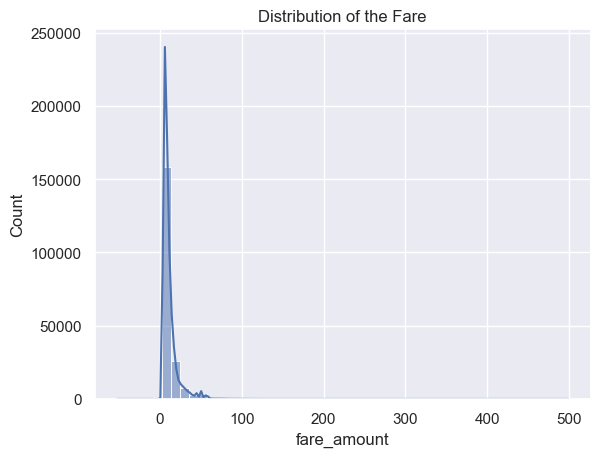

In [24]:
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title('Distribution of the Fare')

From the above graph, we can see that the fare_amount is not normally distributed.

Text(0.5, 1.0, 'Yearwise Distribution of rides')

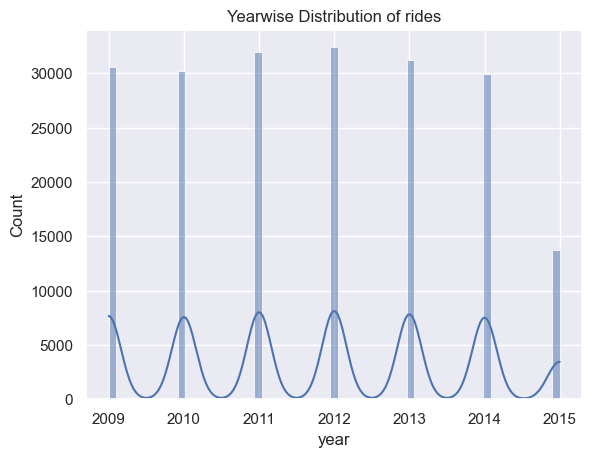

In [25]:
sns.histplot(df['year'], kde=True)
plt.title('Yearwise Distribution of rides')

In [26]:
df_2015 = df[(df['year']==2015)]

In [27]:
df_2015['month'].unique()

array([5, 3, 1, 6, 2, 4])

1. The most rides were booked in 2015 year.
2. The distribution of 2015 is less as compared to others because the data for 2015 is missing after june month.

<Axes: xlabel='month', ylabel='count'>

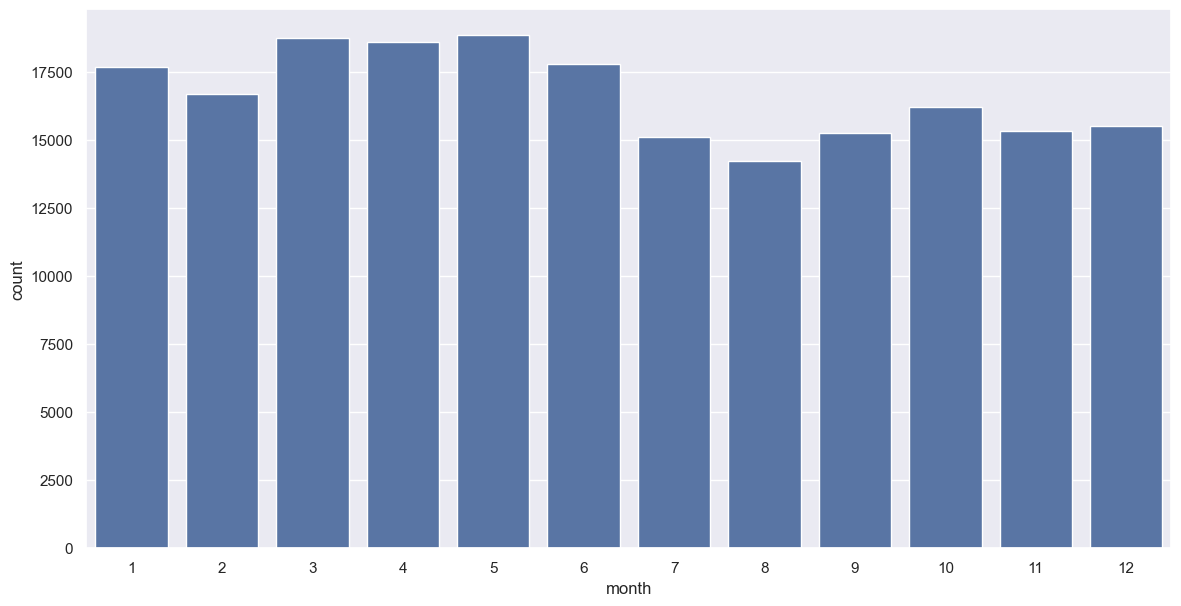

In [28]:
plt.figure(figsize=(14,7))
sns.countplot(x=df['month'], data = df)

<Axes: xlabel='day', ylabel='Count'>

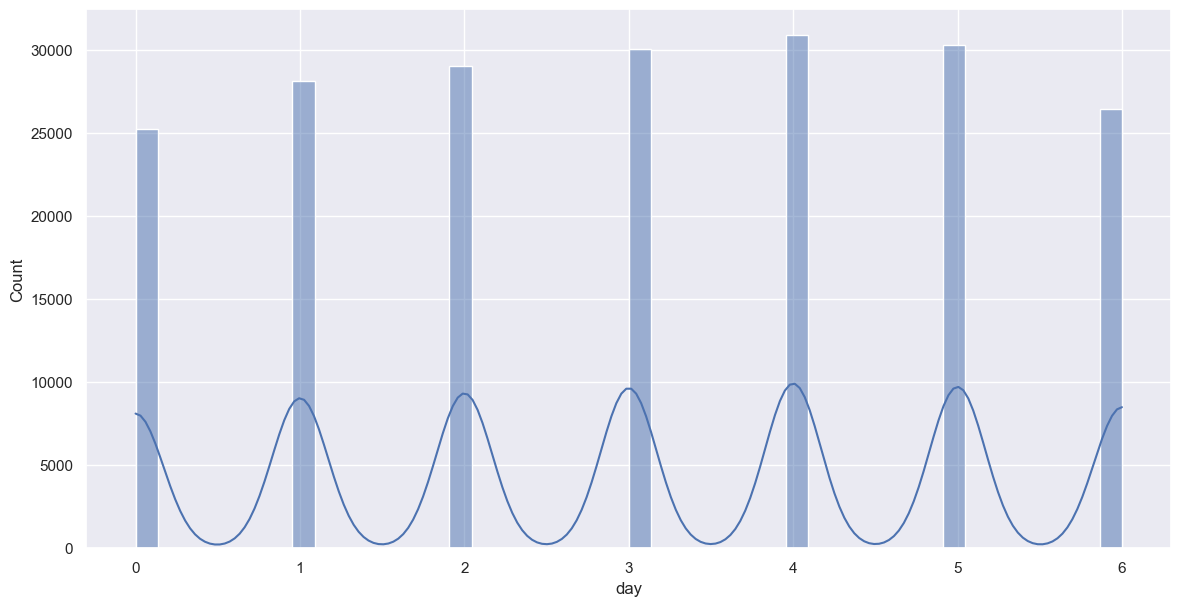

In [29]:
plt.figure(figsize=(14,7))
sns.histplot(x=df['day'], data = df, kde=True)

<Axes: xlabel='hour', ylabel='count'>

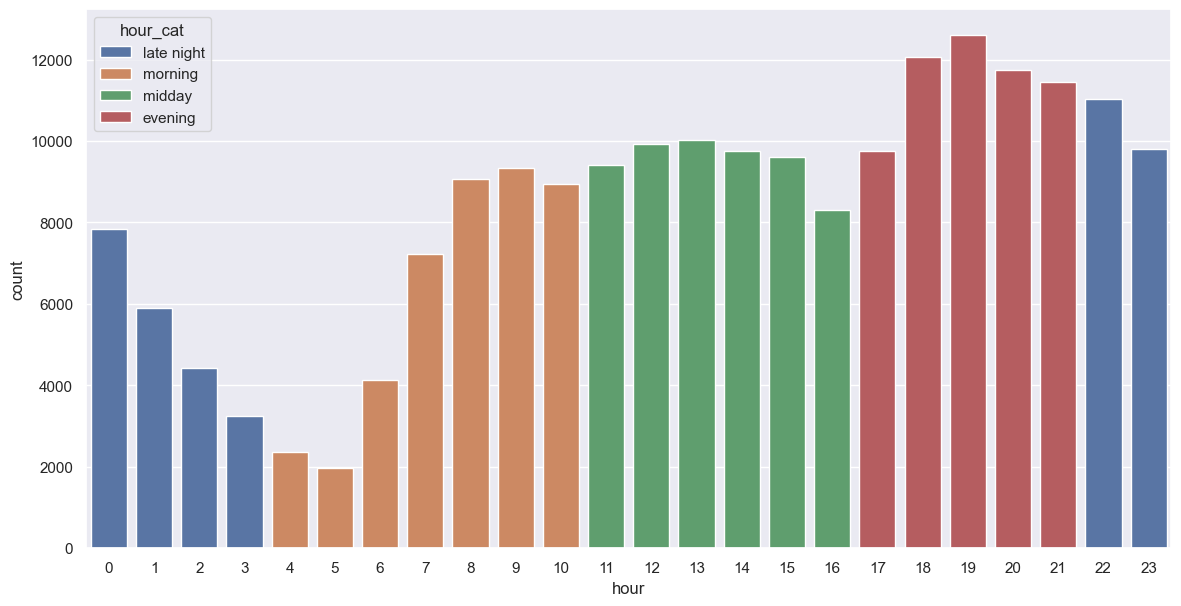

In [122]:
plt.figure(figsize=(14,7))
sns.countplot(x=df['hour'], data = df, hue=df.hour_cat)

In [86]:
weekday = df[(df['day']>=0) & (df['day']<=4)]
weekend = df[(df['day']>=5) & (df['day']<=6)]

<Axes: xlabel='hour', ylabel='count'>

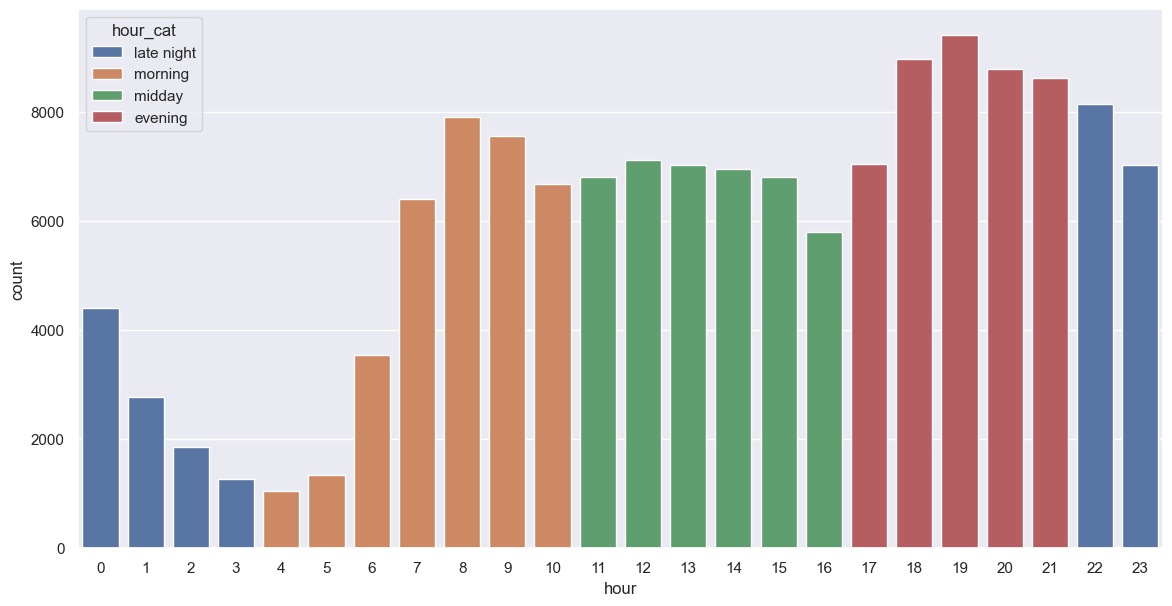

In [95]:
plt.figure(figsize=(14,7))
sns.countplot(data=weekday, x=weekday.hour, hue = weekday.hour_cat)

<Axes: xlabel='hour', ylabel='count'>

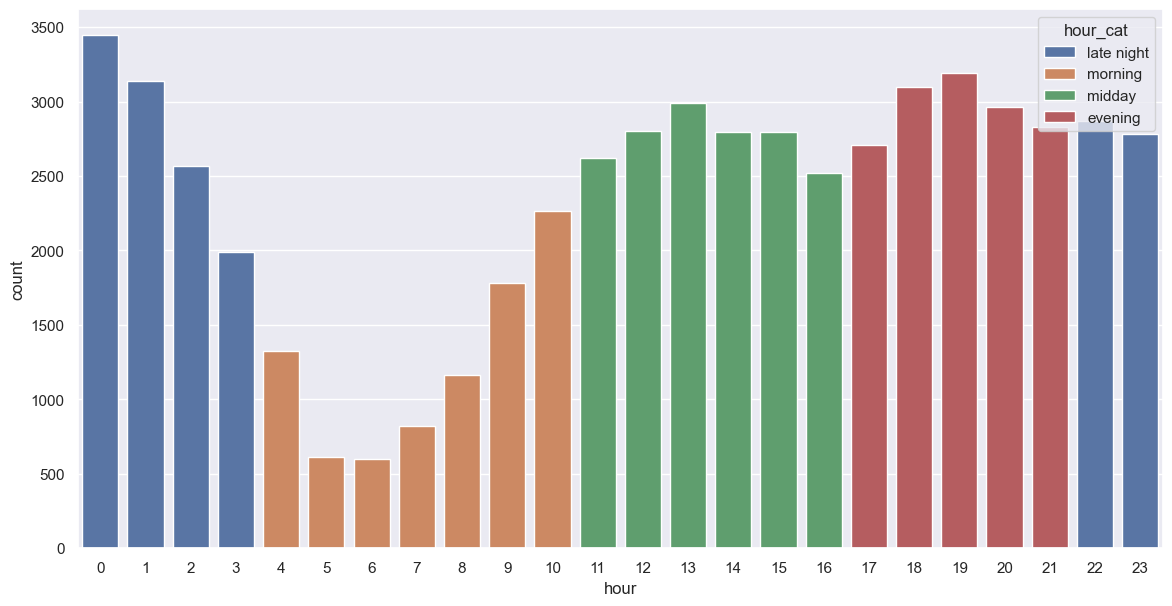

In [94]:
plt.figure(figsize=(14,7))
sns.countplot(data=weekend, x=weekend.hour, hue = weekend.hour_cat)

<Axes: xlabel='day', ylabel='count'>

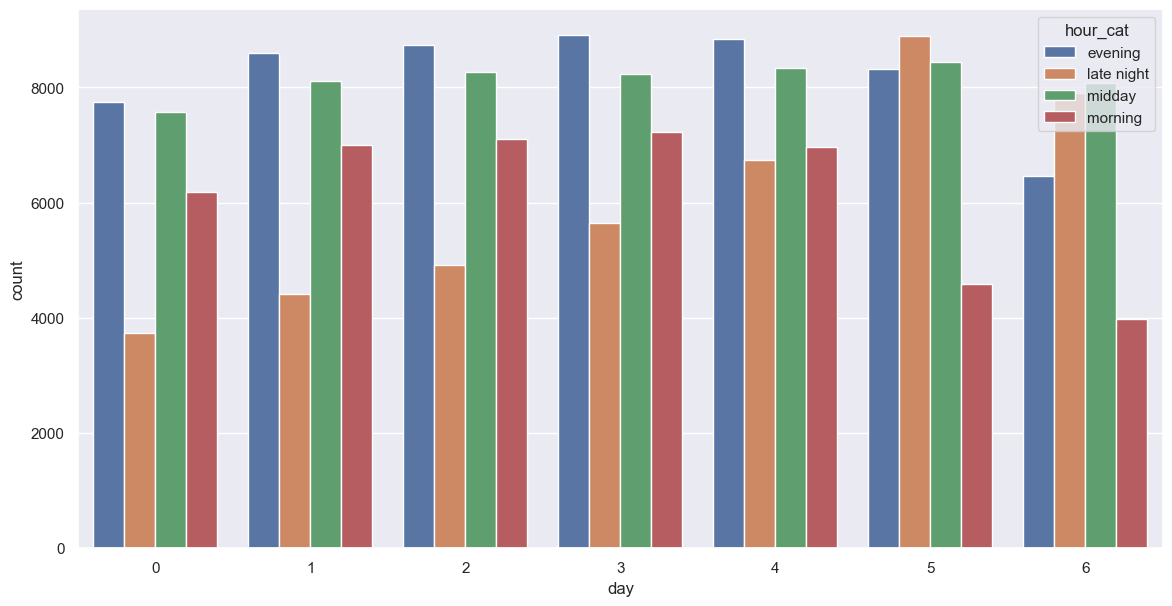

In [93]:
plt.figure(figsize=(14,7))
sns.countplot(data=df, x=df.day, hue=df.hour_cat)

<Axes: xlabel='passenger_count', ylabel='count'>

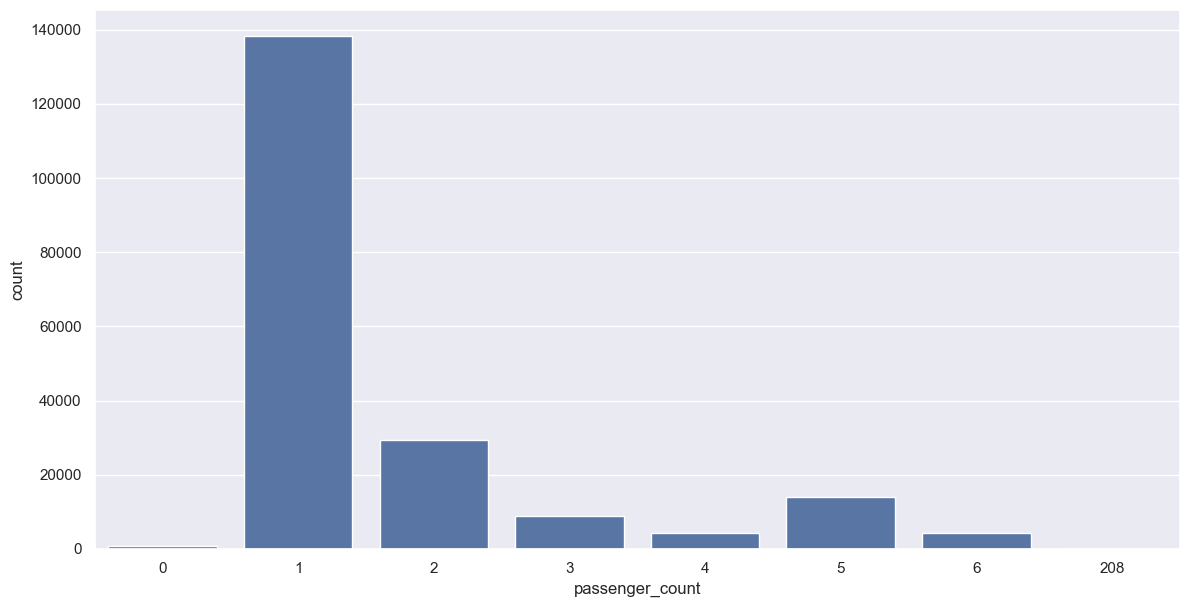

In [132]:
plt.figure(figsize=(14,7))
sns.countplot(x=df.passenger_count, data=df)

### Insights
1. Most rides were booked in the year 2012 and from March to June.
2. During weekdays, 5 pm to 8 pm are the busiest hours for riders because of the passengers' requests.
3. Most of the rides were booked by only a passenger.

#### Multivariate Analysis

In [123]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,minute,hour,hour_cat,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,52,19,evening,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,4,20,evening,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,45,21,evening,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,22,8,morning,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,47,17,evening,4.475450


<Axes: xlabel='passenger_count', ylabel='fare_amount'>

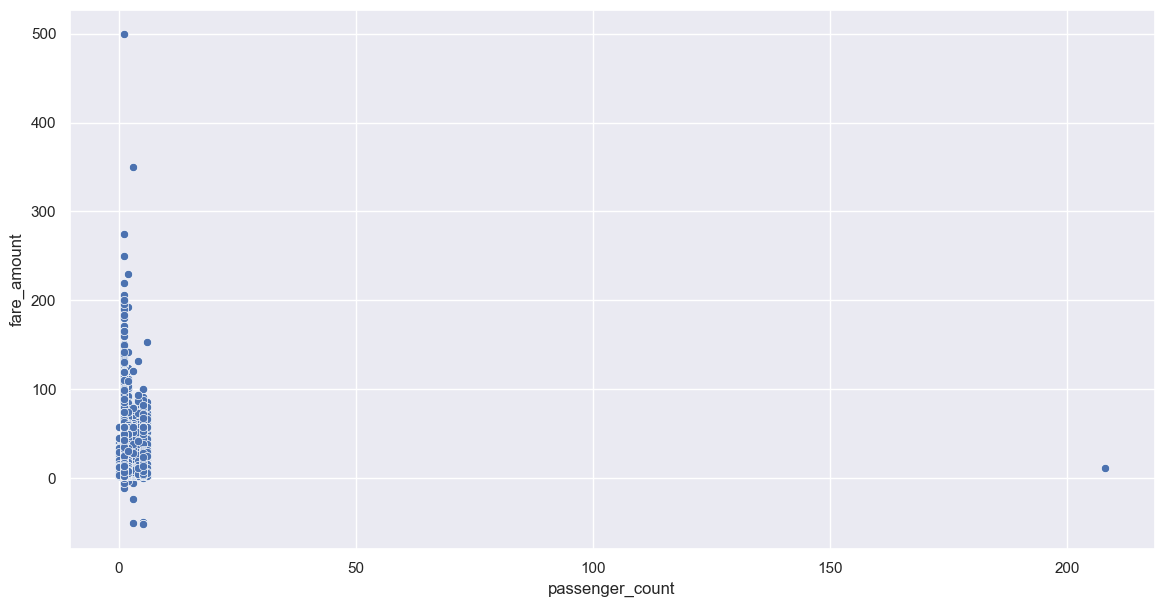

In [130]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=df.passenger_count, y=df.fare_amount, data=df)

<Axes: xlabel='distance_km', ylabel='fare_amount'>

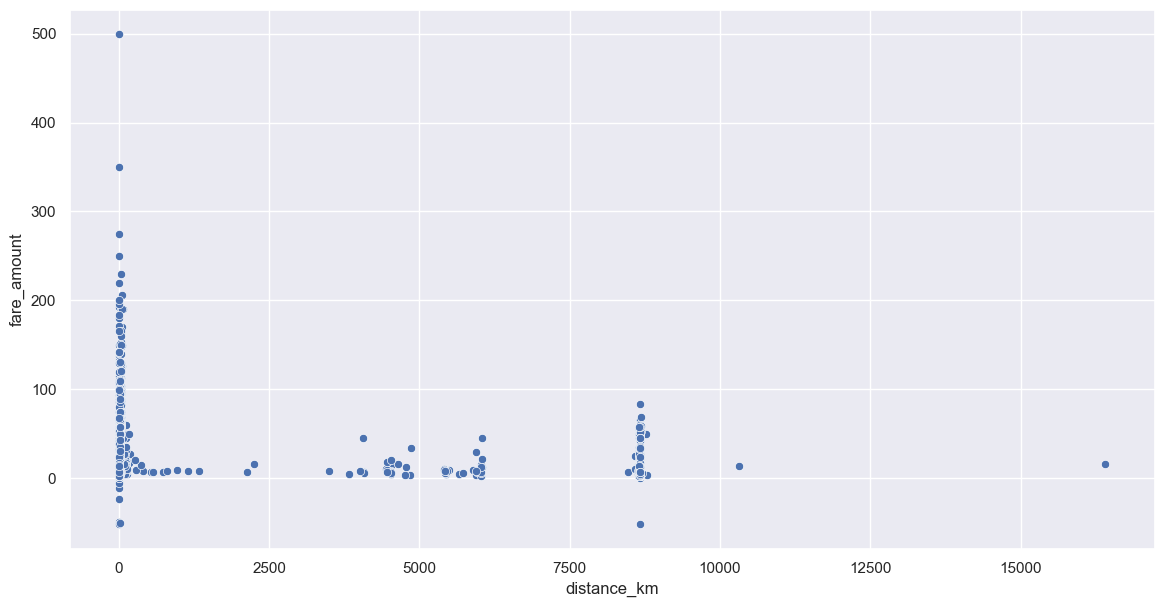

In [131]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=df.distance_km, y=df.fare_amount, data=df)

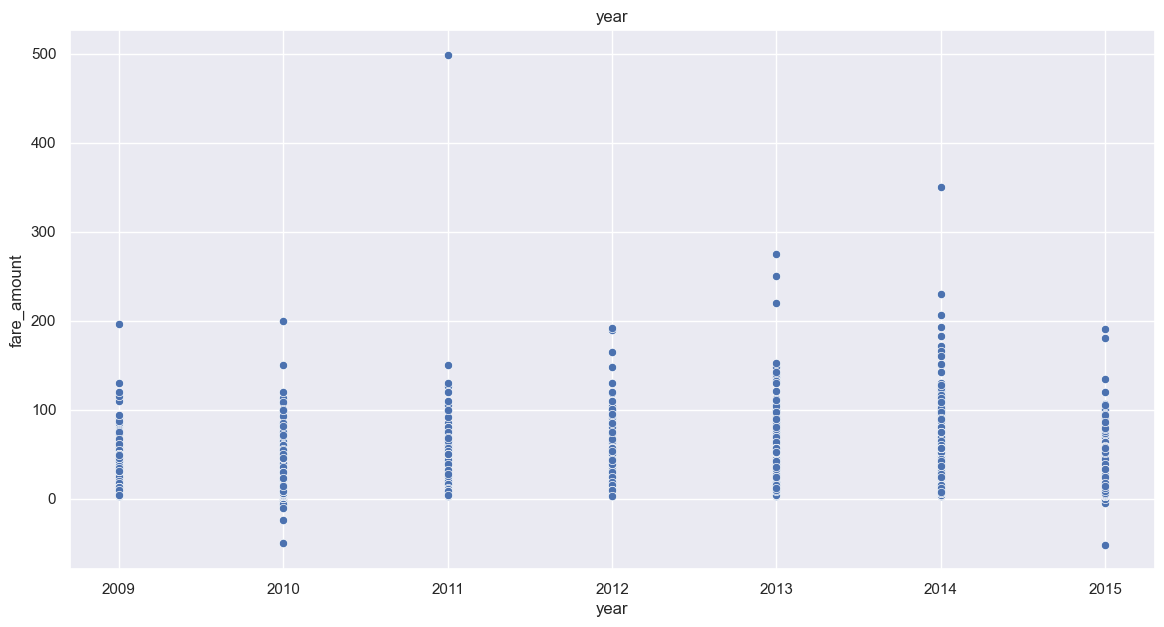

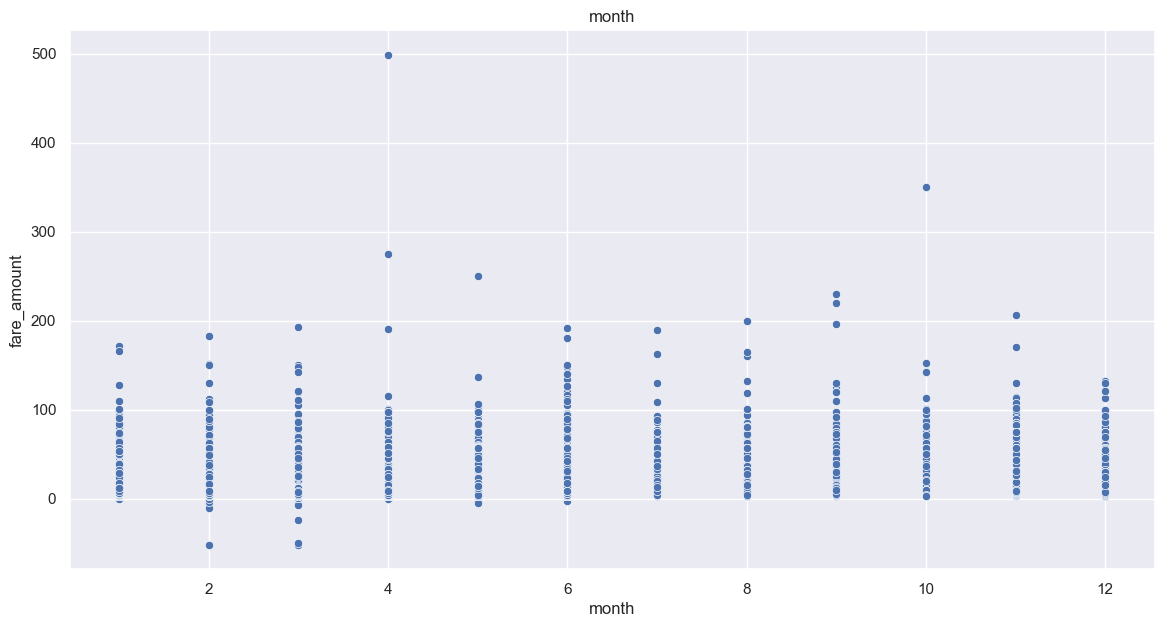

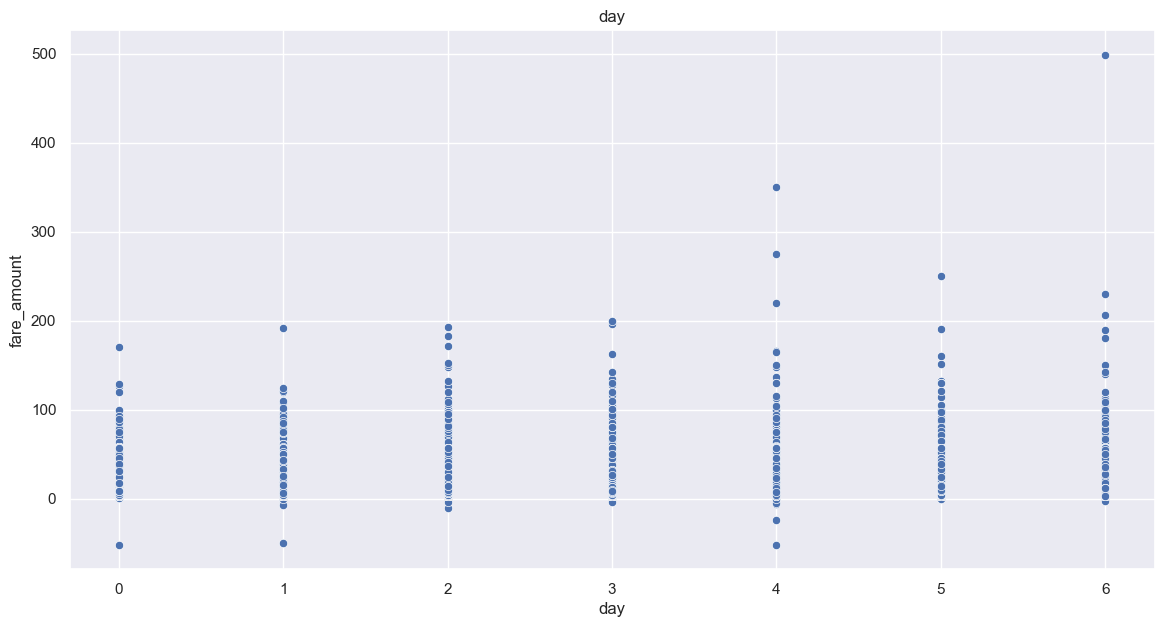

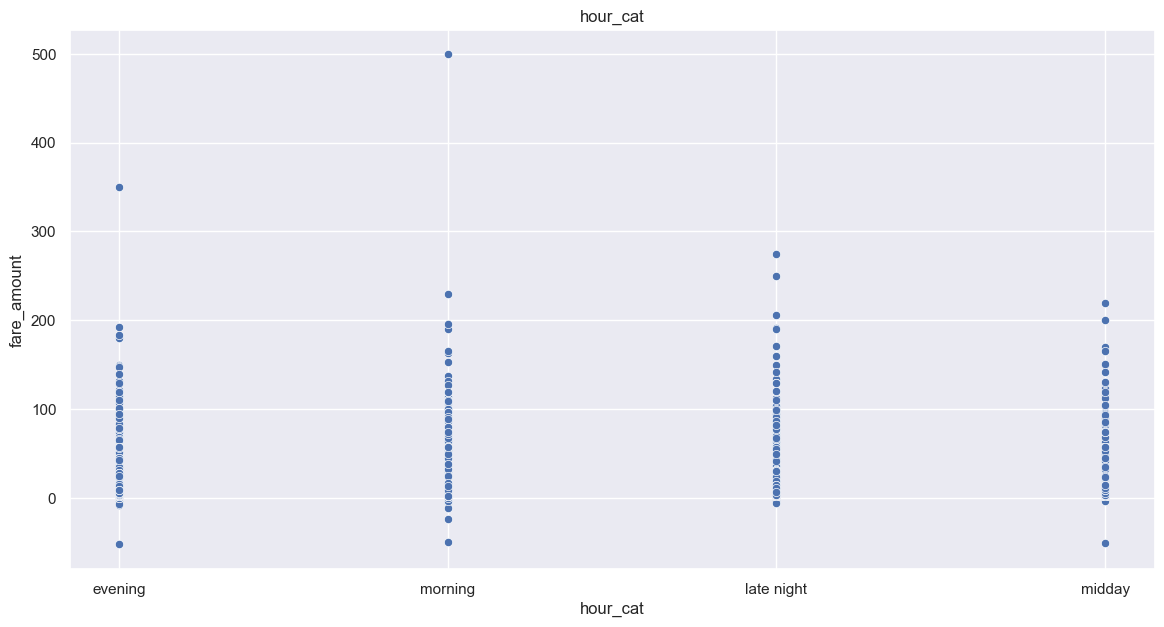

In [136]:
for col in ['year',	'month', 	'day', 'hour_cat']:
    plt.figure(figsize=(14,7))
    sns.scatterplot(x=df[col], y=df.fare_amount, data=df)
    plt.title(col)

In [150]:
df[df['fare_amount']>=400]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,minute,hour,distance_km
170081,499.0,-73.968377,40.764602,-73.968368,40.7646,1,2011,4,6,10,4,0.00079


In [138]:
df.drop('hour_cat', axis=1, inplace = True)

<Axes: >

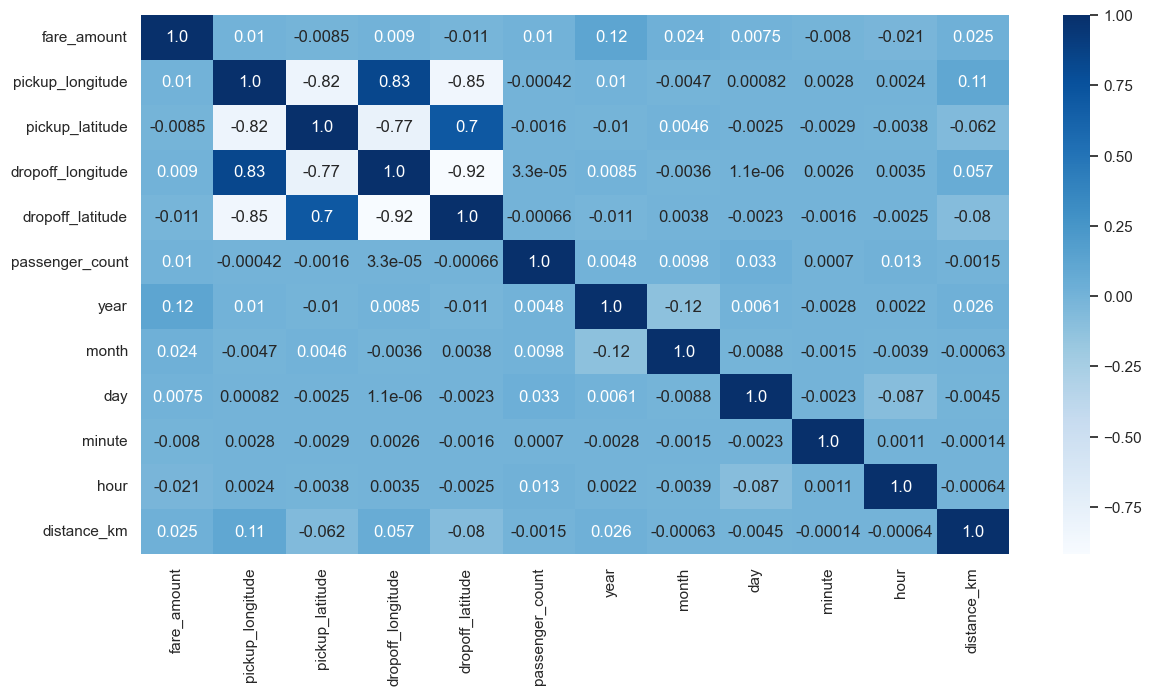

In [145]:
plt.figure(figsize= (14,7))
sns.heatmap(df.corr(), cmap= 'Blues', annot = True, fmt='.2')